# Haberman Dataset analysis
  Haberman Dataset:-
  -This notebook contains analysis of Haberman dataset.
  
  -It contains cases from a study that was conducted between 1958 and 1970 at the University of 
   Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
   
  -This dataset contains 4 columns,These columns with their description are given as:-
    1)Age of patient at time of operation (numerical)

    2)Patient's year of operation (year - 1900, numerical)

    3)Number of positive axillary nodes detected (numerical)

    4)Survival status (class attribute)

      1 = the patient survived 5 years or longer

      2 = the patient died within 5 year


#### OBJECTIVE:-
  By going through the dataset ,I am taking my obective as to classify/predict a patient survival 
  who had undergone surgery for breast cancer.i.e to classify status 1 or status 2


In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Loading data into a dataframe of pandas
haberman = pd.read_csv('haberman.csv')
haberman
# no of rows and columns in the dataset
print(haberman.shape)

#Columns names in the dataset
print(haberman.columns)


(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


 #### OBSERVATION(S):-
     1) The dataset has 306 rows and 4 columns
     2) column names are:-['age', 'year', 'nodes', 'status']

In [5]:
haberman['status'].value_counts()
# From this we can conclude that there are more number of patients who had survived from breast cancer
# by surgery than other which didn't.
# And also this dataset is an imbalanced dataset as number of data points for each class is 
# differnt(225 for status 1,81 for status 2)

1    225
2     81
Name: status, dtype: int64


   Now we will analyse the dataset by two analysis techniques one by one.
    1) Univariant analysis:- (PDF(Probability Density Function),CDF(Cummulative Distribution         Function)Box Plot and Violin Plot.)
    2) Bivariate analysis:-(Scatter Plot and Pair Plot.)


# 1) BIVARIATE ANALYSIS:-
## 1.1)2-D scatter plot


AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5,1,'2-D scatter plot of status & year')

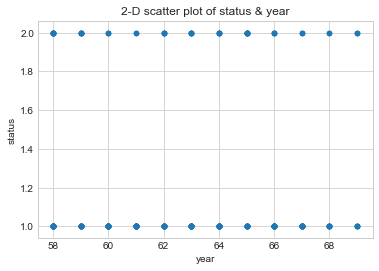

In [36]:
# First,analysis through bivariate analysis should be done by which it can be can known that which pair
# (or may be one variable) is best to fullfil my objective(i.e classification can become easy)
print(haberman.plot(kind = 'scatter', x = 'year',y = 'status'))
plt.title('2-D scatter plot of status & year')


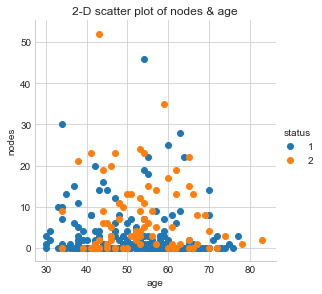

In [37]:
sns.set_style("whitegrid");
g = sns.FacetGrid(haberman, hue="status", size=4) 
g.map(plt.scatter, "age", "nodes") 
g.add_legend();
plt.title('2-D scatter plot of nodes & age')
plt.show();


## 1.2)Pair-Plot

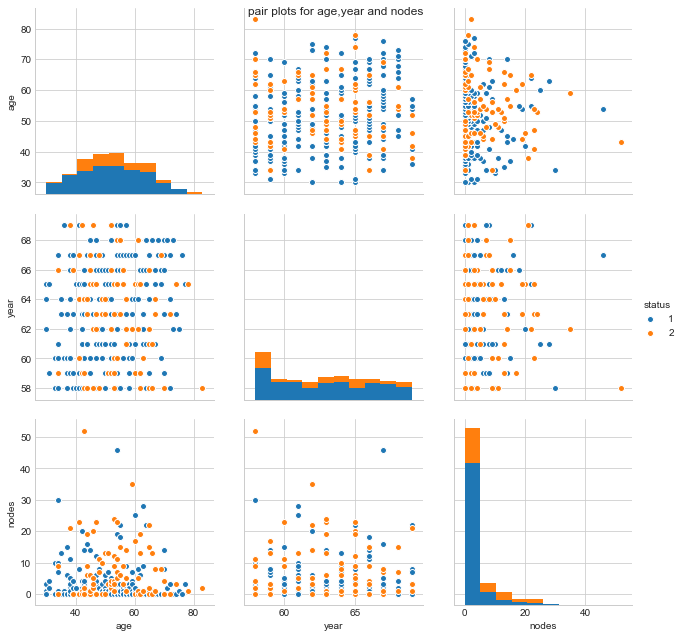

In [38]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman,hue = 'status' ,vars = ['age','year','nodes'], size = 3);
plt.suptitle("pair plots for age,year and nodes")
plt.show();


 #### OBSERVATION(S):-
     1) From all the plots obtained,there is no single plot from which we can easily identify status 1
        or status 2 i.e the patient survived 5 years(status=1) or longer OR the patient died within 5 
        years (status=2).
     2) Although there is plot between age and year from which we can determine status 1 and status 2,
        but not precisely.We cannot divide them in 'if-else' conditions to build a model to classify 
        status.
     3) So from Bivariate analysis of this dataset,it is difficult to find varibales which can easily
        fullfill the objective. 


 # 2) UNIVARIATE ANALYSIS:-
  ## 2.1) Histogram,PDF and CDF


Text(0.5,1,'1-D scatter plot for age')

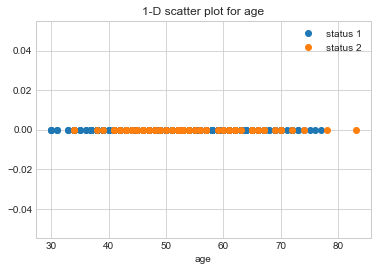

In [43]:
haberman_status1 = haberman.loc[haberman['status'] == 1]
haberman_status2 = haberman.loc[haberman['status'] == 2]
plt.plot(haberman_status1['age'],np.zeros_like(haberman_status1['age']),'o')
plt.plot(haberman_status2['age'],np.zeros_like(haberman_status2['age']),'o')
plt.xlabel('age')
label = ['status 1','status 2']
plt.legend(label);
plt.title('1-D scatter plot for age')

 ## 2.2) Histogram and PDF(Probabilty Density Function)


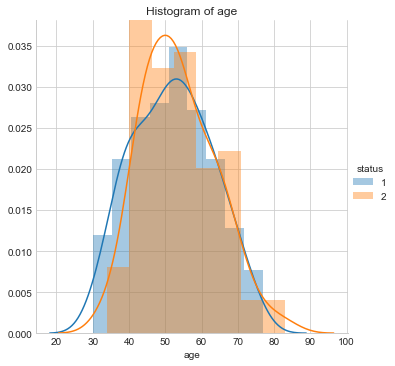

In [12]:
import warnings 
warnings.filterwarnings("ignore") 
import seaborn as sns
g = sns.FacetGrid(haberman,hue = 'status',size = 5)
g.map(sns.distplot,'age')
g.add_legend()
plt.title('Histogram of age')
plt.show()

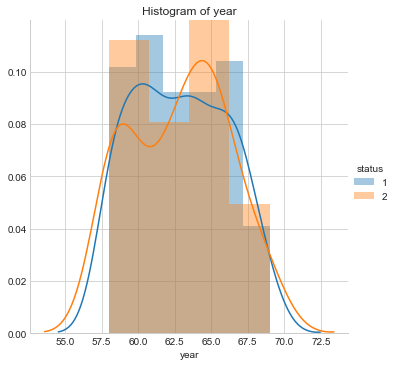

In [13]:
g = sns.FacetGrid(haberman,hue = 'status',size = 5)
g.map(sns.distplot,'year')
g.add_legend()
plt.title('Histogram of year')
plt.show()

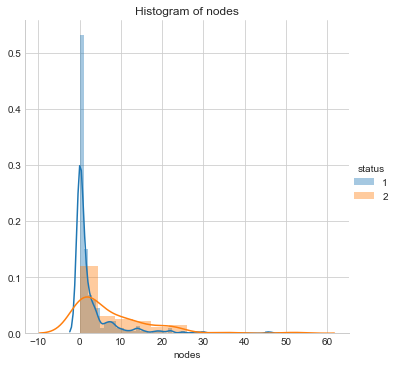

In [14]:
g = sns.FacetGrid(haberman,hue = 'status',size = 5)
g.map(sns.distplot,'nodes')
g.add_legend()
plt.title('Histogram of nodes')
plt.show()

 #### OBSERVATIONS:-
   1) In all the plots all features are overlapping,So classification is very difficult.
   2) In the 3 plot histogram of nodes ,there probabily 55% patients survived who have nodes <=5.

 ## 2.3) PDF(Probability Density Function) & CDF(Cummulative Distributed Function)



[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


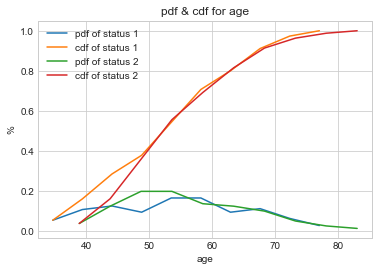

In [16]:
# Calculating PDF and CDF for 'age'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
haberman = pd.read_csv('haberman.csv')
haberman_status1 = haberman.loc[haberman['status'] == 1]
haberman_status2 = haberman.loc[haberman['status'] == 2]
counts, bin_edges = np.histogram(haberman_status1['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.xlabel('age')
plt.ylabel('%')
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman_status2['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('pdf & cdf for age')
label = ['pdf of status 1','cdf of status 1','pdf of status 2','cdf of status 2']
plt.legend(label)

plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


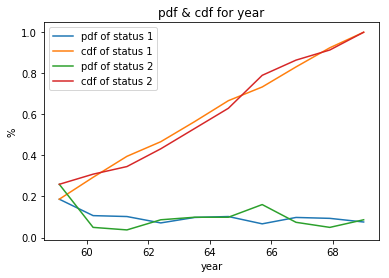

In [22]:
# Calculating CDF and PDF for 'year'
counts , bin_edges = np.histogram(haberman_status1['year'],bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.xlabel('year')
plt.ylabel('%')
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

counts , bin_edges = np.histogram(haberman_status2['year'],bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

plt.title('pdf & cdf for year')
label = ['pdf of status 1','cdf of status 1','pdf of status 2','cdf of status 2']
plt.legend(label)


plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


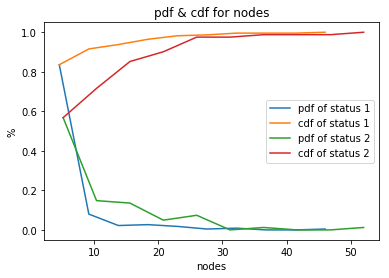

In [23]:
# Calculating CDF and PDF for 'nodes'
counts , bin_edges = np.histogram(haberman_status1['nodes'],bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.xlabel('nodes')
plt.ylabel('%')
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

counts , bin_edges = np.histogram(haberman_status2['nodes'],bins = 10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

plt.title('pdf & cdf for nodes')
label = ['pdf of status 1','cdf of status 1','pdf of status 2','cdf of status 2']
plt.legend(label)

plt.show()

 #### OBSERVATION(S):-
   1) Those persons who has more than around 45 nodes didn't survived.



## 2.4) Box Plot and Whiskers



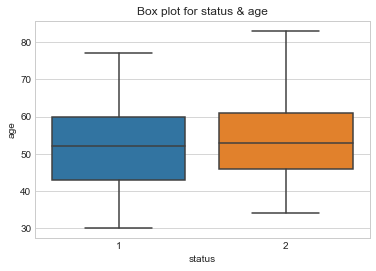

In [33]:
# For 'age'
import seaborn as sns
sns.boxplot(x = 'status',y = 'age', data =  haberman)
plt.title('Box plot for status & age')
plt.show()

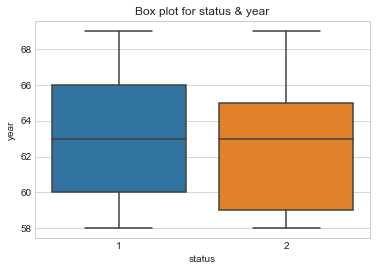

In [34]:
# For 'year'
sns.boxplot(x = 'status',y = 'year',data = haberman)
plt.title('Box plot for status & year')
plt.show()

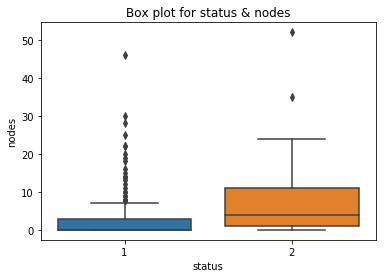

In [30]:
# For 'nodes'
sns.boxplot(x = 'status',y = 'nodes',data = haberman)
plt.title('Box plot for status & nodes')
plt.show()

#### OBSERVATION(S):-
  1) Also from the box plots,it can be concluded that all features are overlapping with their 
     percentiles,and hence it is difficult to classify status 1 or 2 in the case of box plot 
     and whiskers also.
  2) But in case of nodes we can apply if-else condition to classify,but it should start above
     75th percentile of status 1,because below 75th percentile both are overlapping very much.

## 2.5) Violin Plot



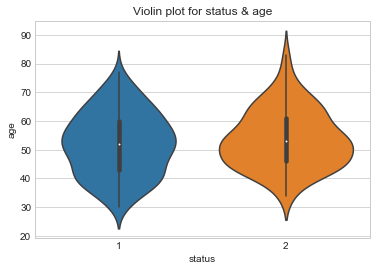

In [19]:
# For 'age'
sns.violinplot(x = 'status', y = 'age', data = haberman, size = 8)
plt.title('Violin plot for status & age')
plt.show()

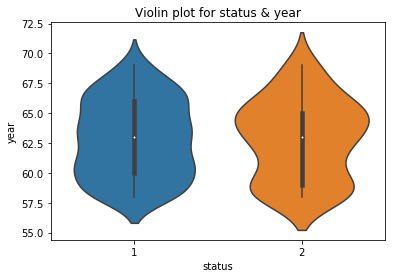

In [32]:
# For 'year'
sns.violinplot(x = 'status',y = 'year',data = haberman,size = 8)
plt.title('Violin plot for status & year')
plt.show()

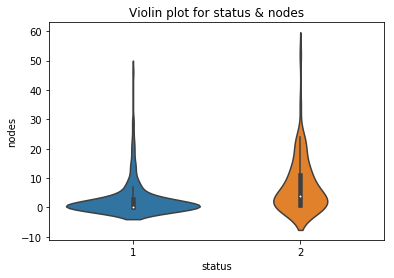

In [33]:
# For 'nodes'
sns.violinplot(x = 'status',y = 'nodes',data = haberman,size = 8)
plt.title('Violin plot for status & nodes')
plt.show()

# Mean,Variance and Standard Deviation
## Mean:-

   The mean is the average of the numbers.
   
## Variance:-

   The average of the squared differences from the Mean.
   
## Standard Deviation:-

   The Standard Deviation is a measure of how spread out numbers are.


In [20]:
# Calculating Mean
print('mean corresponding to the data of status = 1:-')

print('mean of age:')
print(np.mean(haberman_status1['age']))

print('mean of year:')
print(np.mean(haberman_status1['year']))

print('mean of nodes:')
print(np.mean(haberman_status1['nodes']))

print('mean corresponding to the data of status = 2:-')

print('mean of age:')
print(np.mean(haberman_status2['age']))

print('mean of year')
print(np.mean(haberman_status2['year']))

print('mean of nodes')
print(np.mean(haberman_status2['nodes']))

mean corresponding to the data of status = 1:-
mean of age:
52.01777777777778
mean of year:
62.86222222222222
mean of nodes:
2.7911111111111113
mean corresponding to the data of status = 2:-
mean of age:
53.67901234567901
mean of year
62.82716049382716
mean of nodes
7.45679012345679


#### OBSERVATION(S):-
  1) Age of people who survived and who are not survived is same in both case around 52.
  2) And also year of operation('year') same in both status(around 62).
  3) People who survived have values of nodes around 3 whereas people who didn't survived 
     had values of nodes around 8. 

In [34]:
# Calculating Standard Deviation
print('std. deviation corresponding to the data of status = 1:-')

print('std deviation of age:')
print(np.std(haberman_status1['age']))

print('std deviation of year:')
print(np.std(haberman_status1['year']))

print('std deviation of nodes:')
print(np.std(haberman_status1['nodes']))

print('std. deviation corresponding to the data of status = 2:-')

print('std deviation of age:')
print(np.std(haberman_status2['age']))

print('std deviation of year:')
print(np.std(haberman_status2['year']))

print('std deviation of nodes:')
print(np.std(haberman_status2['nodes']))

std. deviation corresponding to the data of status = 1:-
std deviation of age:
10.98765547510051
std deviation of year:
3.2157452144021956
std deviation of nodes:
5.857258449412131
std. deviation corresponding to the data of status = 2:-
std deviation of age:
10.10418219303131
std deviation of year:
3.3214236255207883
std deviation of nodes:
9.128776076761632


 #### OBSERVATIONS:-

   1) Age has maximum std. deviation(max.spread) for both status(1 & 2)  

# Median, Quantiles, Percentiles, IQR



In [21]:
# Caculating Median
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
haberman = pd.read_csv('haberman.csv')
haberman_status1 = haberman.loc[haberman['status'] == 1]
haberman_status2 = haberman.loc[haberman['status'] == 2]

print('Median corresponding to the data of status = 1:-')

print('median of age:')
print(np.median(haberman_status1['age']))

print('median of year:')
print(np.median(haberman_status1['year']))

print('median of nodes:')
print(np.median(haberman_status1['nodes']))

print('Median corresponding to the data of status = 2:-')

print('median of age:')
print(np.median(haberman_status2['age']))


print('median of year:')
print(np.median(haberman_status2['year']))

print('median of nodes:')
print(np.median(haberman_status2['nodes']))

Median corresponding to the data of status = 1:-
median of age:
52.0
median of year:
63.0
median of nodes:
0.0
Median corresponding to the data of status = 2:-
median of age:
53.0
median of year:
63.0
median of nodes:
4.0


In [11]:
#Calculating Quantiles
print('Quantiles corresponding to the data of status = 1:-')

print('quantiles for age:')
print(np.percentile(haberman_status1['age'],np.arange(0, 100, 25)))

print('quantiles for year:')
print(np.percentile(haberman_status1['year'],np.arange(0, 100, 25)))

print('quantiles for nodes:')
print(np.percentile(haberman_status1['nodes'],np.arange(0, 100, 25)))

print('Quantiles corresponding to the data of status = 2:-')

print('quantiles for age:')
print(np.percentile(haberman_status2['age'],np.arange(0, 100, 25)))

print('quantiles for year:')
print(np.percentile(haberman_status2['year'],np.arange(0, 100, 25)))

print('quantiles for nodes:')
print(np.percentile(haberman_status2['nodes'],np.arange(0, 100, 25)))


Quantiles corresponding to the data of status = 1:-
quantiles for age:
[30. 43. 52. 60.]
quantiles for year:
[58. 60. 63. 66.]
quantiles for nodes:
[0. 0. 0. 3.]
Quantiles corresponding to the data of status = 2:-
quantiles for age:
[34. 46. 53. 61.]
quantiles for year:
[58. 59. 63. 65.]
quantiles for nodes:
[ 0.  1.  4. 11.]


In [14]:
# Calculating Median Absolute Deviation(MAD)
from statsmodels import robust
print('MAD corresponding to the data of status = 1:-')

print('MAD for age')
print(robust.mad(haberman_status1['age']))

print('MAD for year')
print(robust.mad(haberman_status1['year']))

print('MAD for nodes')
print(robust.mad(haberman_status1['nodes']))

print('MAD corresponding to the data of status = 2:-')

print('MAD for age')
print(robust.mad(haberman_status2['age']))

print('MAD for year')
print(robust.mad(haberman_status2['year']))

print('MAD for nodes')
print(robust.mad(haberman_status2['nodes']))


MAD corresponding to the data of status = 1:-
MAD for age
13.343419966550417
MAD for year
4.447806655516806
MAD for nodes
0.0
MAD corresponding to the data of status = 2:-
MAD for age
11.860817748044816
MAD for year
4.447806655516806
MAD for nodes
5.930408874022408


 # Concluision:-
   With the dataset of haberman,applying the operations is easy because of small no of rows,but it 
   is difficult to achieve the objective.Because there is no plot or any stastical method by which 
   we can classify status 1 & 2 easily.But still there are some plots like violin plot of nodes by 
   which we can distinguish status 1 from 2 slightly which is not sufficient to fullfill the objective.
